In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import statsmodels.stats as smd
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

from sklearn.metrics import mean_absolute_error
import statsmodels.graphics.tsaplots as smplot

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import statsmodels

In [2]:
data = pd.read_csv('./data.csv', sep = ';')
GDP = data["GDP"].astype('float')
t = data["t"]
d1 = data["d1"]
d2 = data["d2"]
d3 = data["d3"]
data

,GDP,t,d1,d2,d3
0,14430.901,1,1,0,0
1,14381.236,2,0,1,0
2,14448.882,3,0,0,1
3,14651.248,4,0,0,0
4,14764.611,5,1,0,0
5,14980.193,6,0,1,0
6,15141.605,7,0,0,1
7,15309.471,8,0,0,0
8,15351.444,9,1,0,0
9,15557.535,10,0,1,0


In [3]:
data.dtypes

GDP    float64
t        int64
d1       int64
d2       int64
d3       int64
dtype: object

### Корреляция данных

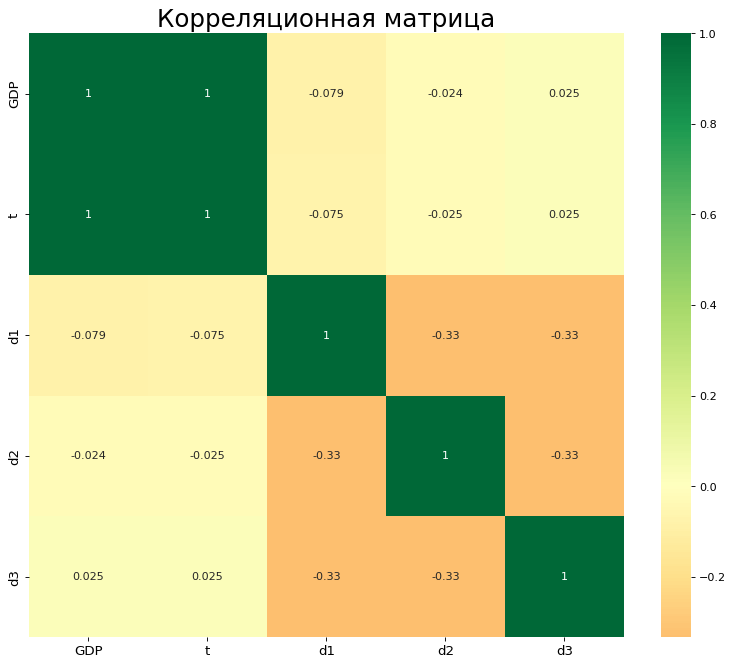

In [4]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Корреляционная матрица', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 800x640 with 0 Axes>

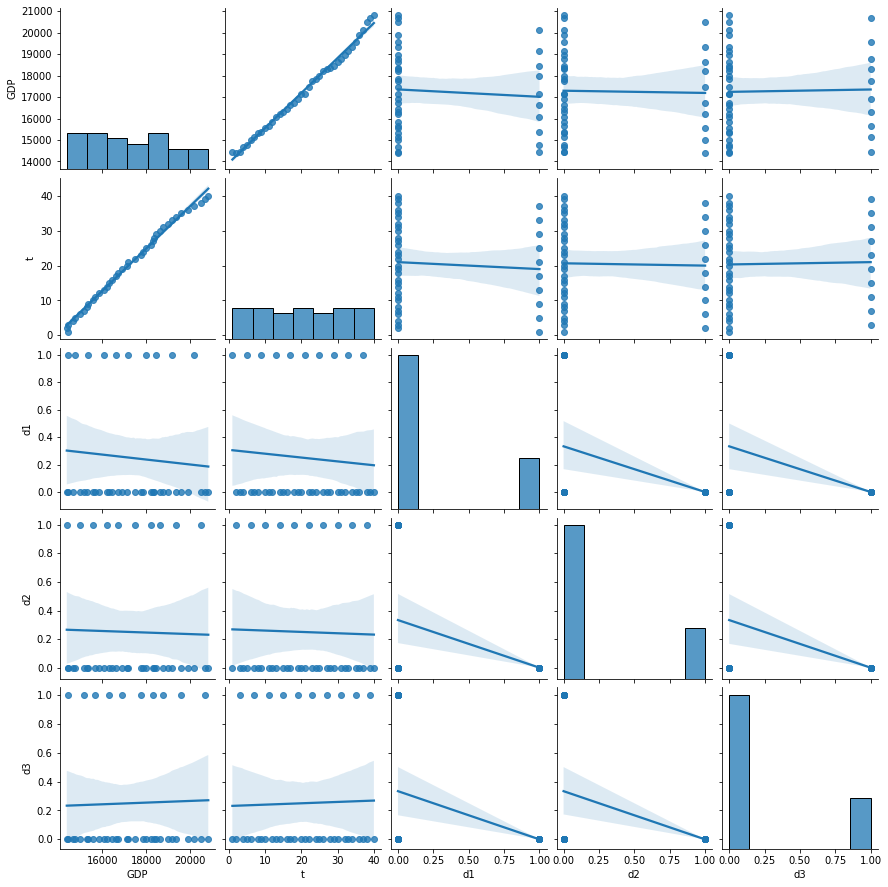

In [5]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data, kind="reg")
plt.show()

### Общая информация о ряде

In [6]:
model = statsmodels.formula.api.ols(formula="GDP ~ t + d1 + d2 + d3", data=data)
results = model.fit()
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1272.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           2.35e-37
Time:                        16:35:34   Log-Likelihood:                -258.76
No. Observations:                  40   AIC:                             527.5
Df Residuals:                      35   BIC:                             536.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.394e+04     73.022    190.866      0.000    1.38e+04    1.41e+04
t            162.8741      2.295     70.956      0.000     158.214     167.534
d1           -21.5819     74.909     -0.288      0.775    -173.656     130.492
d2            -3.8870     74.733     -0.052      0.959    -155.604     147.830
d3            -6.4478     74.627     -0.086      0.932    -157.950     145.054
==============================================================================
Omnibus:                        7.767   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.710
Skew:                           0.965   Prob(JB):                       0.0349
Kurtosis:                       3.550   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Построите 95%-й доверительный интервал для коэффициентов модели. 

In [7]:
results.conf_int(0.05)

,0,1
Intercept,13789.071280,14085.554720
t,158.214180,167.534057
d1,-173.655954,130.492063
d2,-155.603571,147.829644
d3,-157.949544,145.053980


### Проверьте значимость модели регрессии в целом и каждого коэффициента модели по отдельности.

#### Коэфф детерминации R^2

In [8]:
print(results.rsquared)

0.9931656812314454


Модель очень качественная R^2 = 0.9931656812314454  (приближено к 1)

#### Скорректированный коэфф детерминации R^2

In [9]:
print(results.rsquared_adj)

0.992384616229325


Модель очень качественная R^2 исп = 0.992384616229325 (приближено к 1)

#### Средняя ошибка модели

In [10]:
print(np.sqrt(results.scale))

166.79307833679542


In [11]:
GDP

0     14430.901
1     14381.236
2     14448.882
3     14651.248
4     14764.611
5     14980.193
6     15141.605
7     15309.471
8     15351.444
9     15557.535
10    15647.681
11    15842.267
12    16068.824
13    16207.130
14    16319.540
15    16420.386
16    16629.050
17    16699.551
18    16911.068
19    17133.114
20    17144.281
21    17462.703
22    17743.227
23    17852.540
24    17991.348
25    18193.707
26    18306.960
27    18332.079
28    18425.306
29    18611.617
30    18775.459
31    18968.041
32    19153.912
33    19322.920
34    19558.693
35    19882.965
36    20143.716
37    20492.492
38    20659.102
39    20813.325
Name: GDP, dtype: float64

Качество нормальное (умеренное отношение) т.к. относительно GDP дельта не очень большая

#### Ошибка аппроксимации

In [12]:
pred_val0 = results.fittedvalues.copy()
true_val0 = data["GDP"]
e0 = true_val0 - pred_val0

In [13]:
approx = (1/len(data["t"]))*sum(abs(e0/data["GDP"]))*100
approx

0.6557104010463974

0.6557104 < 5% - качество отличное

#### F-значение

In [14]:
results.fvalue

1271.5531723161253

#### P-значения

In [15]:
p_values = results.summary2().tables[1]['P>|t|']
p_values

Intercept    2.067394e-54
t            2.051548e-39
d1           7.749637e-01
d2           9.588155e-01
d3           9.316412e-01
Name: P>|t|, dtype: float64

#### Сделайте выводы о качестве модели.

Можем сделать вывод о том, что модель в целом значима и качествена

### Постройте прогноз ВВП на первые три квартала 2019 года.

In [16]:
# Заносим данные в list для последующей конвертации в df
t_list = [41,42,43]
d1_list = [1,0,0]
d2_list = [0,1,0]
d3_list = [0,0,1]

In [17]:
predict_df = pd.DataFrame(list(zip(t_list, d1_list, d2_list, d3_list)), columns =['t', 'd1','d2', 'd3'])
predict_df

,t,d1,d2,d3
0,41,1,0,0
1,42,0,1,0
2,43,0,0,1


In [18]:
predicts = results.predict(predict_df)
predicts

0    20593.5699
1    20774.1390
2    20934.4523
dtype: float64

### Проверьте выполнение предпосылки о гомоскедастичности

#### Тест Гольдфельда-Квандта

In [19]:
GQtest = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(['F statistic', 'p-value'], GQtest)

[('F statistic', 7.0439914815772875), ('p-value', 0.0002533745839260362)]

GQ < Fтаб – Гомоскедастичность – H0<br>
GQ > Fтаб – Гетероскедастичность - Hа<br>
GQ = 7.044, df1 = 15, df2 = 15, p-value = 0.0002534<br>
alternative hypothesis: variance increases from segment 1 to 2<br>
p-value = 0.0002534 < (0.1; 0.05; 0.01), присутствует проблема гетероскедастичности<br>

#### Теста Бройша-Пагана

In [20]:
BPtest = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(['BP','p-value'], BPtest)

[('BP', 7.372650664850022), ('p-value', 0.11745775190824606)]

Гомоскедастичность – H0<br>
Гетероскедастичность - Hа<br>
BP = 7.3727, df = 4, p-value = 0.1175<br>
p-value = 0.1175 > (0.1; 0.05; 0.01), отсутствует проблема гетероскедастичности<br>


### Проверьте выполнение предпосылки об отсутствии автокорреляции остатков

#### Тест Дарбина-Уотсона

In [21]:
DWtest = sms.stattools.durbin_watson(results.resid)
DWtest

0.2812986339406746

H0: нет автокорреляции<br>
Ha: есть автокорреляция 1-го порядка<br>

DW = 0.2813, p-value = 2.683e-13<br>
Нужен только для тестирования автокорреляции 1-го порядка<br>
DW приближен к 0, что говорит о существовании положительной автокорреляции.<br>
p-value = 2.683e-13 < (0.01, 0.05, 0.1) - отвергаем гипотезу об отсутствии автокорреляции, принимаем гипотезу о существовании автокоррелции

#### Тест Бройша-Годфри

In [22]:
for n in range(1,4):
    BGtest = sms.acorr_breusch_godfrey(results, nlags=n)
    r = lzip(['Chisq statistic','p-value', 'F statistic','p-value(F)'], BGtest)
    print(f"\nАвтокорреляция {n} порядка")
    for item in r:
        print(item)


Автокорреляция 1 порядка
('Chisq statistic', 25.27054363659575)
('p-value', 4.982602360556703e-07)
('F statistic', 58.33198880163416)
('p-value(F)', 7.081129588346276e-09)

Автокорреляция 2 порядка
('Chisq statistic', 25.282916470499217)
('p-value', 3.2350756829397155e-06)
('F statistic', 28.345841818931873)
('p-value(F)', 6.84020467963689e-08)

Автокорреляция 3 порядка
('Chisq statistic', 25.30368461976252)
('p-value', 1.3339876284291301e-05)
('F statistic', 18.365553697930054)
('p-value(F)', 4.1178214245277255e-07)


H0: нет автокорреляции<br>
Ha: есть автокорреляция n порядка<br>

Не требует нормальности остатков,<br>
LM test = 25.271, df = 1, p-value = 4.983e-07<br>
LM test = 25.283, df = 2, p-value = 3.235e-06<br>
LM test = 25.304, df = 3, p-value = 1.334e-05<br>
pv = 4.983e-07 < (0.01, 0.05, 0.1) => Hа принимается, автокорреляция 1 порядка присутствует<br>
pv = 3.235e-06 < (0.01, 0.05, 0.1) => Hа принимается, автокорреляция 2 порядка присутствует<br>
pv = 1.334e-05 < (0.01, 0.05, 0.1) => Hа принимается, автокорреляция 3 порядка присутствует<br>


### Рассчитайте ACF и PACF для временного ряда GDP. Сделайте выводы о стационарности временного ряда на основе коррелогармы. 

#### ACF

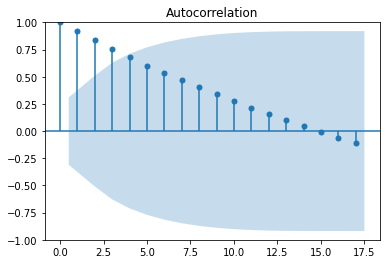

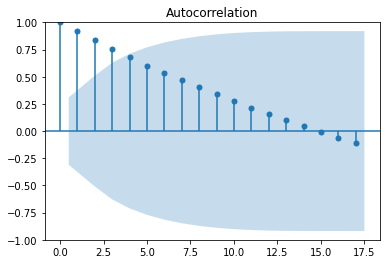

In [23]:
smplot.plot_acf(GDP)

#### PACF

/opt/homebrew/lib/python3.9/site-packages/statsmodels-0.14.0.dev0-py3.9-macosx-11-arm64.egg/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


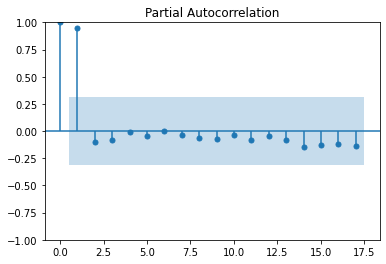

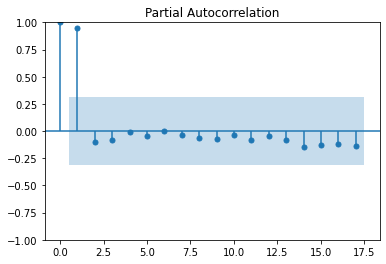

In [24]:
smplot.plot_pacf(GDP)

### Проведите тесты на стационарность.

In [25]:
from arch.unitroot import PhillipsPerron, ADF, KPSS

#### Dickey-Fuller Test

In [26]:
adf = ADF(GDP)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  2.350
P-value                         0.999
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.61 (1%), -2.94 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### Phillips-Perron Test   

In [27]:
pp = PhillipsPerron(GDP)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                  3.291
P-value                         1.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.61 (1%), -2.94 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### KPSS Test for Level Stationarity

In [28]:
kpss = KPSS(GDP)
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.907
P-value                         0.004
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
